# React FFC 08 `useEffect`



**References**  
- freeCodeCamp.org (2020) Full React Course 2020 - Learn Fundamentals, Hooks, Context API, React https://www.youtube.com/watch?v=4UZrsTqkcW4&ab_channel=freeCodeCamp.org
- Tutorial by Mr. John Smilga

## 1 - re-render and run 
`useEffect` by default runs after every re-render.

<br>

In the example below, see how the `useEffect` is executed in the console. It is never called in the snippet, but by default it runs once when the `UseEffectBasics` component is executed.

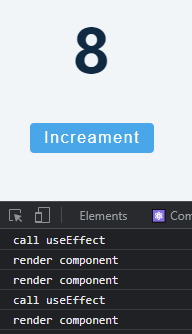

In [1]:
import React, { useState, useEffect, Fragment } from 'react';

const UseEffectBasics = () => {
  const [value, setValue] = useState(0);

  useEffect(() => {   # Note that this useEffect is never called anywhere. But will execute once anyway.
    console.log('call useEffect');
  });
  console.log('render component');

  return (
    <Fragment>
      <h1>{value}</h1>
      <button className='btn' onClick={()=> setValue(value+1)}>Increament</button>
    </Fragment>
  )
};

### Not inside a conditional

The hook cannot reside within a conditional. What should we do if we want to update the value of the the document title upon certain condition? 

See below. The logic of the wrong snippet is: 
- if the value is greater than 5, only then call useEffect. (outside the `Hook`)

The solution to this probelm is:
- `useEffect` is called every time. But the update will be executed when the condition is met (inside the `Hook`)

In [ ]:
# Wrong conditioning

if (value > 5) {    
  useEffect(() => {  # useEffect is inside 'if'.
    console.log('call useEffect');
      document.title = `New Messages(${value})`;
    }
  });
  console.log('render component');

In [ ]:
# Correect conditioning
  useEffect(() => {
    console.log('call useEffect');
    if (value > 5) {
      document.title = `New Messages(${value})`;
    }
  });
  console.log('render component');

### Dependency List (the second parameter)
    useEffect(()=> {

    }, [dependency list]);

- `}, []);` empty dependency list
  - Makes the `useEffect` run only once.
- `}, [dependency list]);` list with data
  - 

In [ ]:
  useEffect(() => {
    console.log('call useEffect');
    if (value > 5) {
      document.title = `New Messages(${value})`;
    }
  }, [value]);

## 2 - cleanup function

The useEffect hook is built in a way that if we return a function within the method, this function will execute when the component gets disassociated. This is very useful because we can use it to remove unnecessary behavior or prevent memory leaking issues ([Martín Mato](https://dev.to/otamnitram/react-useeffect-cleanup-how-and-when-to-use-it-2hbm)). 

In [ ]:
# basic syntax

useEffect(() => {
    API.subscribe()
    return function cleanup() {
        API.unsubscribe()
    }
})

### resize window

In [ ]:
const UseEffectCleanup = () => {
  const [width, setWidth] = useState(window.innerWidth);
  const [height, setHeight] = useState(window.innerHeight);
  console.log(width);
  console.log(height);

  const checkWidth = () => {
    setWidth(window.innerWidth);
  }

  const checkHeight = () => {
    setHeight(window.innerHeight);
  }

  useEffect(() => { # event 'resize' will listen to changing window size.
                   # every time window is resized, 
                   # we call this callback funciton checkWidth, 
                   # which in turn triggers re-render.
    window.addEventListener('resize', checkWidth); 
    window.addEventListener('resize', checkHeight);
  })

  return (
    <Fragment>
      <h1>Window</h1>
      <h3>{width } * {height}</h3>
    </Fragment>
  );
};

### cleanup! 


In [ ]:
#   useEffect(() => {
    console.log('resize')
    window.addEventListener('resize', checkWidth);       # subscribe
    window.addEventListener('resize', checkHeight);      # subscribe
    return ()=> {
      console.log('cleanup');
      window.removeEventListener('resize', checkWidth);  # unsubscribe
    }
  });

## 3 - Fetch data
`useEffect` cannot return `promise`. Therefore, it cannot use `async` function. 

- Wrong syntax  

    `useEffect(async () => {`

- Correct approach - use async either:
  - inside the `useEffect` or
  - outside the `useEffect`

In [ ]:
  const getUsers = async() => {
    const response = await fetch(url);
    const users = await response.json();
    setUsers(users);
  };

  useEffect(() => {
    getUsers();
  }, []);       # make sure to pass in the dependency list. Otherwise you'll dance in infinity with a crash cocktail.

## Tap title
`document.title = random text for title`